# Exploring Book Prices and Reviews Using Python

## Introduction
In this project, I act as a **data analyst** for a hypothetical online bookstore.  
Leadership posed three key business questions:  
1. Does price correlate with book rating?  
2. What is the distribution of ratings and prices?  
3. What is the average rating per price bucket?  

To answer these, I scraped and cleaned **1,000 book records**, prepared the dataset, and performed analyses using **Python (pandas & matplotlib)**.  

This project demonstrates a complete **end-to-end workflow**:  
- **ETL** → web scraping, data cleaning, and preparation  
- **Analysis & Visualizations** → answering leadership’s questions  
- **Insights & Recommendations** → framing results for business decision-making  

## Data Preparation/ Cleaning

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import random
import matplotlib

In [2]:
#This is the target URL
url = 'http://books.toscrape.com/'
base_url = "http://books.toscrape.com/catalogue/page-{}.html"
#Create a list to hold book data
books = []


for page in range(1,51):#here we will cycle through all the pages
    if page == 1:
        url
    else:
        url = base_url.format(page)
    
    #Here we are fetching the HTML
    response = requests.get(url) #This will go get the html page and return a '<Response [200]> ' if successful
    soup = BeautifulSoup(response.text, 'html.parser') # Turns raw HTML into a Soup object, which behaves like a tree of HTML tags

    # Find all book containers on the page
    for book in soup.find_all("article", class_="product_pod"):                  #This is used to find all the book containers
        title = book.h3.a["title"]                                               #drilling down into the  <h3><a> tags to find the title
        price = book.find("p", class_="price_color").text.strip()                # Here we find the price for the book and then get the text, strip it, and remove unwanted characters
        price = price.replace("£", "").replace(",", "").replace('Â','')
        availability = book.find("p", class_="instock availability").text.strip() 
        rating = book.p["class"][1]                                              #This pulls the rating in a list ['star-rating', 'Three'] then we ask for index 1
    
        books.append({
            "Title": title,
            "Price (GBP)": float(price),
            "Availability": availability,
            "Rating": rating
        })
        
print('Done')


Done


In [7]:
df = pd.DataFrame(books)

# Add a new column for the row index which we will use when we split this up into 2 df
df['Row'] = df.index
df

,Title,Price (GBP),Availability,Rating,Row
0,A Light in the Attic,51.77,In stock,Three,0
1,Tipping the Velvet,53.74,In stock,One,1
2,Soumission,50.10,In stock,One,2
3,Sharp Objects,47.82,In stock,Four,3
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,4
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock,One,995
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock,Four,996
997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock,Five,997
998,1st to Die (Women's Murder Club #1),53.98,In stock,One,998


In [8]:
# converting the Rating column to number
def convert_to_num(i):
    if i == 'One':
        return 1
    elif i == 'Two':
        return 2
    elif i == 'Three':
        return 3
    elif i == 'Four':
        return 4
    elif i == 'Five':
        return 5
    else:
        return 999

df['Rating'] = df['Rating'].apply(convert_to_num)

df[df['Rating']==999] #This is to ensure we do not have any missing data here or data that was not One -> Five

,Title,Price (GBP),Availability,Rating,Row


In [9]:
#Here we will generate a random number for each one to simulate inventory counts
def generate_inventory(i):
    return random.randint(1, 300)

inventory = df['Title'].apply(generate_inventory)
df['Inventory'] = inventory

In [10]:
# This will create a simulated last sold field 
dates_ = []
for i in range(0,1000):
    m = random.randint(1,12)
    d = random.randint(1,28)
    y = random.randint(2000,2025)
    dates_.append(f"{m}/{d}/{y}")

df['Last_date_sold'] = dates_

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1000 non-null   object 
 1   Price (GBP)     1000 non-null   float64
 2   Availability    1000 non-null   object 
 3   Rating          1000 non-null   int64  
 4   Row             1000 non-null   int64  
 5   Inventory       1000 non-null   int64  
 6   Last_date_sold  1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [12]:
# Here I will try to optimize the dataframe by changing the datatypes
# We will change the datatypes from object to category which will drop the memory usage.
df.nunique()

Title              999
Price (GBP)        903
Availability         1
Rating               5
Row               1000
Inventory          286
Last_date_sold     953
dtype: int64

In [13]:
# Here we will drop the 'availability' column too since all these books are instock so we dont need this info.
df.drop('Availability', axis=1, inplace =True) 
df['Rating'] = df['Rating'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Title           1000 non-null   object  
 1   Price (GBP)     1000 non-null   float64 
 2   Rating          1000 non-null   category
 3   Row             1000 non-null   int64   
 4   Inventory       1000 non-null   int64   
 5   Last_date_sold  1000 non-null   object  
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 40.4+ KB


In [14]:
change = round(1-(40.4/54.8),2)*100
print('Memory was improved by '+ str(change)+'%')

Memory was improved by 26.0%


In [15]:
#Reorganizing the df
df = df[['Row','Title','Price (GBP)', 'Inventory', 'Rating','Last_date_sold']]

In [16]:
df.head(5)

,Row,Title,Price (GBP),Inventory,Rating,Last_date_sold
0,0,A Light in the Attic,51.77,108,3,6/17/2023
1,1,Tipping the Velvet,53.74,201,1,9/10/2016
2,2,Soumission,50.10,279,1,11/1/2021
3,3,Sharp Objects,47.82,270,4,8/14/2015
4,4,Sapiens: A Brief History of Humankind,54.23,97,5,5/9/2002


In [17]:
# Here we are checking for missing values
df.info()
#Since we have no null values we can move on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Row             1000 non-null   int64   
 1   Title           1000 non-null   object  
 2   Price (GBP)     1000 non-null   float64 
 3   Inventory       1000 non-null   int64   
 4   Rating          1000 non-null   category
 5   Last_date_sold  1000 non-null   object  
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 40.4+ KB


In [18]:
# Here we are trying to remove duplicates but none are found
df = df[~df.duplicated(keep=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Row             1000 non-null   int64   
 1   Title           1000 non-null   object  
 2   Price (GBP)     1000 non-null   float64 
 3   Inventory       1000 non-null   int64   
 4   Rating          1000 non-null   category
 5   Last_date_sold  1000 non-null   object  
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 40.4+ KB


In [19]:
#Here we will split the df into 2 to simulate separate tables and simulate joins

rating = df[['Row','Title','Rating']].copy()
inventory = df[['Row','Price (GBP)', 'Inventory','Last_date_sold']].copy()


# rating.to_csv('rating',index=False)
# inventory.to_csv('inventory',index=False)


# The two lines above are commented out since these csv's were already generated and everytime we run the notebook
# we replace the random values. 
# To continue please use the csv's I provided.

In [20]:
#Importing the CSV's we will work with and checking for duplicates in these csv's
inventory = pd.read_csv('inventory', parse_dates=['Last_date_sold']).sort_index()
rating = pd.read_csv('rating')

rating.nunique()

Row       1000
Title      999
Rating       5
dtype: int64

In [21]:
inventory.nunique()

Row               1000
Price (GBP)        903
Inventory          294
Last_date_sold     937
dtype: int64

In [22]:
# We noticed that rating has one duplicate 
# Here we investigate and see that this is in fact a duplicate title

rating[rating['Title'].duplicated(keep=False)]

,Row,Title,Rating
236,236,The Star-Touched Queen,5
358,358,The Star-Touched Queen,5


In [24]:
# Here we search up the same row number and see that they have different Price information
# Also inventory and last date sold but this is simulated data. 
# We will remove the the first record that occurs.

inventory[(inventory['Row'] ==236) | (inventory['Row'] == 358)]

,Row,Price (GBP),Inventory,Last_date_sold
236,236,46.02,26,2004-03-17
358,358,32.30,77,2014-05-11


In [25]:
# Here we have removed record 236 from both dataframes

inventory = inventory[inventory['Row'] != 236]
rating = rating[rating['Row'] != 236]

In [26]:
# Verification to see if there is actually no more duplicates

rating[rating['Title'].duplicated(keep=False)]

,Row,Title,Rating


In [27]:
# Here we will join the two dataframes to have one main dataframe
# We will do a left join since we are sure that rating will have all the records

master_df = rating.merge(inventory,how='left',left_on='Row',right_on ='Row')
master_df.head()

,Row,Title,Rating,Price (GBP),Inventory,Last_date_sold
0,0,A Light in the Attic,3,51.77,129,2021-03-01
1,1,Tipping the Velvet,1,53.74,251,2004-12-02
2,2,Soumission,1,50.10,207,2008-11-22
3,3,Sharp Objects,4,47.82,214,2001-08-13
4,4,Sapiens: A Brief History of Humankind,5,54.23,66,2006-10-17


## Analysis

Leadership posed three key business questions:  
1. Does price correlate with book rating?  
2. What is the distribution of ratings and prices?  
3. What is the average rating per price bucket?  

#### Question 1: Does price correlate with book rating?

In [28]:
master_df.groupby('Rating')['Price (GBP)'].mean().round(2)

Rating
1    34.56
2    34.81
3    34.69
4    36.09
5    35.32
Name: Price (GBP), dtype: float64

- Above we see that the average price is similar for all ratings

In [29]:
corr_value = master_df['Price (GBP)'].corr(master_df['Rating'])
print("Correlation between Price and Rating:", corr_value.round(3))

Correlation between Price and Rating: 0.027


<Axes: xlabel='Rating', ylabel='Price (GBP)'>

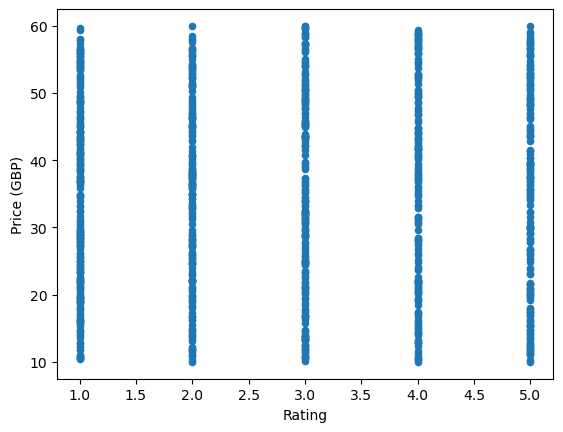

In [30]:
master_df.plot.scatter(x="Rating", y="Price (GBP)")

#### Findings: 
- Since the correlation result is close to 0, there is no correlation between Price and Rating
- This is supported by the scatterplot and the average prices

#### Question 2: What is the distribution of ratings and prices?

##### First we will look at ratings:

In [31]:
master_df['Rating'].value_counts().sort_index()

Rating
1    226
2    196
3    203
4    179
5    195
Name: count, dtype: int64

- Above is used to see how many records fall under each rating

<Axes: title={'center': 'Books per Rating'}, xlabel='Rating'>

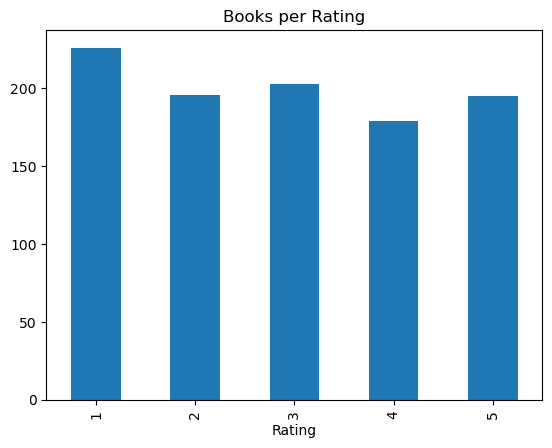

In [32]:
rating_counts = master_df['Rating'].value_counts().sort_index()
rating_counts.plot(kind="bar", title="Books per Rating")

##### Now we will look at prices:

In [33]:
print('Below we have the min, max, and mean values:')
print('Max:',master_df['Price (GBP)'].max(),'Min:',master_df['Price (GBP)'].min(),'Mean:',master_df['Price (GBP)'].mean().round(2))

Below we have the min, max, and mean values:
Max: 59.99 Min: 10.0 Mean: 35.06


<Axes: xlabel='Row', ylabel='Price (GBP)'>

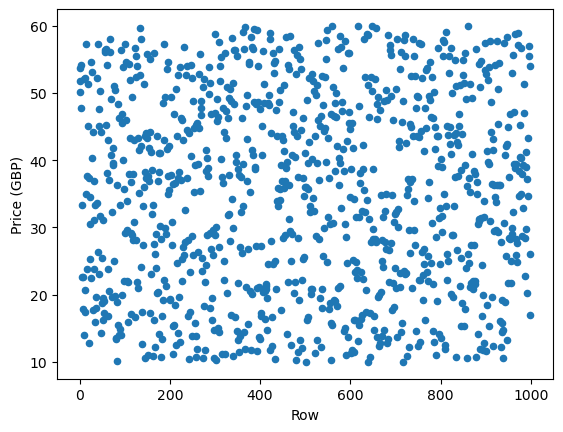

In [34]:
master_df.plot.scatter(x="Row", y="Price (GBP)")

- The price ranges from 10.00 (min) to 59.99 (max), with a mean of ~35.06
- The scatter plot above shows each book's price across dataset rows
- This lets us check if prices are spread evenly across the dataset (which they are)
- However, scatter plots do not summarize the distribution well
- To better understand the distribution, we'll group prices into 4 buckets

In [35]:
def price_bucket(i):
    if i <= 15:
        return '<= 15'
    if i <= 30:
        return '<=30'
    if i <= 45:
        return '<= 45'
    if i <= 60:
        return '<=60'
    else:
        return 'error'
master_df['price_bucket'] = master_df['Price (GBP)'].apply(price_bucket)

#checking if all are mapped correctly
master_df[master_df['price_bucket']=='error']

,Row,Title,Rating,Price (GBP),Inventory,Last_date_sold,price_bucket


<Axes: title={'center': 'Books per Price Bucket'}, xlabel='price_bucket'>

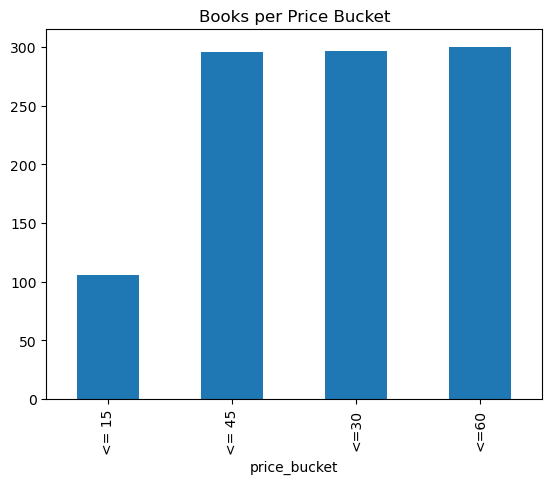

In [36]:
# Count how many books fall into each price bucket
counts = master_df["price_bucket"].value_counts().sort_index()


counts.plot(kind="bar", title="Books per Price Bucket")

#### Findings: 
- Individuals are consistently rating our books across the full range of 1–5
- We see that the number of books priced at ≤30, ≤45, and ≤60 GBP are fairly even
    - However, there are noticeably fewer books (around 100) priced at ≤15 GBP
- From Q1, we learned that ratings are not correlated with price, meaning lower-priced books do not necessarily receive worse reviews
- Since reviews are well distributed across price ranges, this suggests there may be an untapped market for books under 15


#### Question 3: What is the average rating per price bucket?

In [37]:
print('Avg rating per price bucket:')
master_df.groupby('price_bucket')['Rating'].mean().round(3)

Avg rating per price bucket:


price_bucket
<= 15    3.075
<= 45    2.895
<=30     2.795
<=60     3.017
Name: Rating, dtype: float64

In [38]:
print('Count of ratings per price bucket:')
master_df.groupby('price_bucket')['Rating'].count().round(3)

Count of ratings per price bucket:


price_bucket
<= 15    106
<= 45    296
<=30     297
<=60     300
Name: Rating, dtype: int64

#### Findings: 
- The average ratings are fairly close across all price buckets (2.79–3.07)
- The ≤15 GBP books have the highest average rating (3.08), even though they have the lowest count (106 books)
- Mid & higher price buckets (≤30, ≤45, ≤60) don’t show a clear advantage in ratings

### Recommendations:

- Since Q1 showed no overall correlation between price and ratings, this bucket analysis confirms that paying more doesn’t guarantee higher reviews

- However, the cheaper bucket (≤15 GBP) stands out slightly for higher average ratings, suggesting readers don’t punish low-cost books in reviews

- **Recommendation:**

    - Expand the ≤15 GBP category:
        - Since these books have fewer books available (supply gap).
        - Those books still achieve slightly higher ratings.

    - Increasing selection here could tap into a price-sensitive audience and boost overall sales without hurting quality perception.

#### Limitations:

- This dataset includes synthetic data populated at random, which explains why there is no correlation.